<a href="https://colab.research.google.com/github/boxfather78/MaV/blob/main/MaV_Summative_Assessment_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color='Orange'> Modelling & Visualisation - Summative Assessment </font> 

---
This Colab workbook is split into 6 parts as follows:
- **Part 1**: imports, cleans and prepares card transaction data for analysis
- **Part 2**: exploratory data analysis with data visualisations
- **Part 3**: Model feature engineering
- **Part 4**: Creation of a series of analytical models to classify whether a card transaction is potentially fraudulent, alongside analysis of the benefits of each type of model
- **Part 5**:  An evaluation of the outcomes for each model using the test (and if applicable) validation datasets, and the creation of a table to store accuracy metrics
- **Part 6**: Illustrations showing the analytical outputs in an engaging manner.

# <font color='Orange'> 1: Data Import, cleansing and preparation </font>

In [65]:
http://colab.research.google.com/github/boxfather78/MaV/blob/main 

SyntaxError: ignored

1.1: Pandas and Numpy data libraries support reading in and wrangling datasets.

In [2]:
import pandas as pd
import numpy as np

1.2: Upload the card transaction dataset as an array. (Enable 3rd party cookies.)

In [3]:
from google.colab import files
df1 = files.upload() # Navigate to and select 'CreditCardDataFinal.csv'

Saving CreditCardDataFinal.csv to CreditCardDataFinal (1).csv


1.3: Import dataframe formatter for easier viewing. Extract data into Pandas dataframe and sort by Transaction ID.

In [4]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

df1 = pd.read_csv('CreditCardDataFinal.csv')
print(df1.shape)
df1.sort_values(["Transaction ID"], ascending=True).head()

(100000, 16)


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
25167,#2546 884,13-Oct-20,Tuesday,23,MasterCard,CVC,£17,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,60.5,Barclays,0
74516,#2546 895,14-Oct-20,Wednesday,21,Visa,CVC,£28,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,49.7,RBS,0
57940,#2546 903,13-Oct-20,Tuesday,19,Visa,CVC,£8,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,46.2,Barclays,0
9776,#2546 906,14-Oct-20,Wednesday,9,MasterCard,PIN,£186,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,51.3,Barclays,0
52568,#2546 920,13-Oct-20,Tuesday,22,Visa,CVC,£86,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,59.6,Monzo,0


In [5]:
# Install latest version of Pandas Profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)


In [7]:
# Import ProfileReport and run to explore the dataset
from pandas_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

1.4: DUPLICATES: From the profile report, we can see there are duplicates in the Transaction ID variable, which we might have considered a primary key. There are no full duplicates. Let's look at the Txn ID duplicates.

In [56]:
# Add column to show full column-wise duplication and another column for Transaction ID duplicates
df1['Full_duplicate'] = df1.duplicated(keep='first')
df1['TxnID_duplicate'] = df1["Transaction ID"].duplicated(keep='first')

# Create dataframe of duplicates and count Txn IDs
df1_full_dupe = df1[(df1['Full_duplicate'] == True)]
df1_dupe = df1[(df1['TxnID_duplicate'] == True)]
print("There are", len(df1_full_dupe), "duplicates across the file.") # 0 duplicates in file
print("There are", len(df1_dupe), "duplicates in the Transaction ID column") # 4,320 duplicates by Transaction ID in file

There are 0 duplicates across the file.
There are 4320 duplicates in the Transaction ID column


In [57]:
# Look at some of the Transaction ID duplicates
dupe_list = df1_dupe["Transaction ID"].tolist() # Create list of duplicated Txn IDs

# Create dataframe of first 5 duplicate Txn IDs and the most frequently occurring Txn ID as shown by profile report, then view all matching records
df1_dupesamp = df1[df1["Transaction ID"].isin(dupe_list[0:4])]
df2_dupesamp = df1[df1["Transaction ID"] == "#2547 017"]
df3_dupesamp = df1_dupesamp.append(df2_dupesamp).sort_values(["Transaction ID"], ascending=True) 
df3_dupesamp

#Duplicate Transaction IDs don't look like duplicate transactions, so will keep all records, and NOT use Transaction ID variable as index

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,Full_duplicate,TxnID_duplicate
28252,#2547 017,13-Oct-20,Tuesday,21,Visa,PIN,£113,POS,Services,United Kingdom,United Kingdom,United Kingdom,F,36.6,HSBC,0,False,False
32446,#2547 017,14-Oct-20,Wednesday,24,MasterCard,CVC,£371,Online,Electronics,India,India,India,M,57.7,Barclays,1,False,True
44905,#2547 017,13-Oct-20,Tuesday,23,MasterCard,CVC,£370,Online,Electronics,India,India,India,M,23.6,Barclays,0,False,True
72114,#2547 017,13-Oct-20,Tuesday,8,Visa,Tap,£28,POS,Food,United Kingdom,United Kingdom,United Kingdom,M,54.5,Lloyds,0,False,True
94149,#2547 017,14-Oct-20,Wednesday,22,Visa,PIN,£114,POS,Services,United Kingdom,United Kingdom,United Kingdom,F,46.4,HSBC,1,False,True
662,#3003 533,13-Oct-20,Tuesday,19,MasterCard,PIN,£15,ATM,Gaming,United Kingdom,United Kingdom,United Kingdom,M,30.8,Barclays,0,False,False
1516,#3003 533,14-Oct-20,Wednesday,20,Visa,CVC,£17,Online,Subscription,India,India,India,M,39.6,Barclays,0,False,True
38,#3322 751,14-Oct-20,Wednesday,19,Visa,PIN,£11,ATM,Gaming,United Kingdom,United Kingdom,United Kingdom,F,45.0,Monzo,0,False,False
3293,#3322 751,14-Oct-20,Wednesday,7,MasterCard,PIN,£129,POS,Food,United Kingdom,United Kingdom,United Kingdom,M,54.6,Barclays,0,False,True
75944,#3322 751,14-Oct-20,Wednesday,22,Visa,Tap,£28,POS,Restaurant,USA,USA,USA,M,36.4,Barclays,0,False,True


In [48]:
# Is a duplicate transaction ID an indicator of Fraud?
fraud_dupe = pd.crosstab(index=df1_dupe["Fraud"], columns="Count", normalize = "columns").round(4)*100
fraud_rate = pd.crosstab(index=df1["Fraud"], columns="Count", normalize = "columns").round(4)*100
print(fraud_dupe, "\n", fraud_rate)
# Positive fraud rate of duplicates is 7.87% vs. full file rate of 7.2%

col_0  Count
Fraud       
0      92.13
1       7.87 
 col_0  Count
Fraud       
0       92.8
1        7.2


1.5: COMPLETENESS check for missing values

In [58]:
# We can see 25 missing values in the dataset from the profile report. Validating information here.
print(sum(df1.isnull().any(axis=1)))
# See which columns have missing values
print(df1.isna().sum());

'''There are 23 rows with missing values across Amount, Merchant Group, Shipping Address and Gender.''' 

23
Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
Full_duplicate             0
TxnID_duplicate            0
dtype: int64


'There are 23 rows with missing values across Amount, Merchant Group, Shipping Address and Gender.'

In [62]:
# Create dataframe to explore rows with missing values then check fraud rates across dataset
null_data = df1[df1.isnull().any(axis=1)]
fraud_null = pd.crosstab(index=null_data["Fraud"], columns="Count", normalize = "columns").round(4)*100
print(fraud_null)

'''Fraud rate is 13% where a value is missing, versus 7.2%, meaning 1.8 more likely to be fraud if at least one value is missing.'''

col_0  Count
Fraud       
0      86.96
1      13.04


'Fraud rate is 13% where a value is missing, versus 7.2%, meaning 1.8 more likely to be fraud if at least one value is missing.'

1.55: Null value treatments. 

* Taking an average value could be one option for in-fill of the 6 missing values for Amount, but this could skew the outcome, since 3 of the 6 are fraudulent. We'll come back to this.
* It's not possible to impute Merchant Group or Shipping Address by using other information. Since this is a categorical variable, we could just label these as unknown, but with so few missing records I will remove.
* A missing gender is unlikely to be a significant indicator of fraud, and we cannot impute a value, so drop these rows.

In [98]:
# Deal with nulls as shown above - remove rows with missing Genders, Merchant Groups and Shipping Address
df1.dropna(how='any', subset=['Gender','Merchant Group','Shipping Address'], inplace=True) # Removes 17 records

print(df1.shape)
df1.head()

(99983, 18)


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,Full_duplicate,TxnID_duplicate
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,False
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,False
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,False
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,False
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,False,False


1.6: CONFORMITY - Check Data Types
Recommended actions are:
* Convert 'Date' and 'Time' to DateTime variable, to support possible future data ingestion
* Convert 'Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction','Merchant Group','Country of Transaction','Shipping Address','Country of Residence','Bank' into Category variables to make variable contents clear.
* 'Amount' should be a float variable, but we have number rounded to a whole number as an object. To convert, we will first remove currency symbol, as all are in GBP.

In [99]:
print(df1.dtypes)

Transaction ID             object
Date                       object
Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                     object
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
Full_duplicate               bool
TxnID_duplicate              bool
dtype: object


In [100]:
# Replace £ signs and convert Amount to a float
df1["Amount"] = df1["Amount"].replace('£', '', regex=True)
df1 = df1.astype({"Amount": 'float'})
# Convert object variables into Categorical
df1 = df1.astype({"Day of Week": 'category',"Type of Card": 'category',"Entry Mode":'category',"Type of Transaction":'category',
                  "Merchant Group":'category',"Country of Transaction":'category',"Shipping Address":'category',
                  "Country of Residence":'category',"Bank":'category',"Gender":'category'})

# Convert Date into Datetime variable
df1["Date"] = pd.to_datetime(df1["Date"])
# Would also like to add the hour to the above to create one new variable
# df1["Time"] = pd.datetime.time(df1["Time"])
print(df1.dtypes)

In [102]:
print(df1.dtypes)
df1.head()

Transaction ID                    object
Date                      datetime64[ns]
Day of Week                     category
Time                               int64
Type of Card                    category
Entry Mode                      category
Amount                           float64
Type of Transaction             category
Merchant Group                  category
Country of Transaction          category
Shipping Address                category
Country of Residence            category
Gender                          category
Age                              float64
Bank                            category
Fraud                              int64
Full_duplicate                      bool
TxnID_duplicate                     bool
dtype: object


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,Full_duplicate,TxnID_duplicate
0,#3577 209,2020-10-14,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,False
1,#3039 221,2020-10-14,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,False
2,#2694 780,2020-10-14,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,False
3,#2640 960,2020-10-13,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,False
4,#2771 031,2020-10-13,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,False,False


1.7: INTEGRITY: Check category variable frequencies using pandas crosstab method - as it allows us to check Total.

In [ ]:
print(df1.describe) # add mumeric vars here. Alternative use pandas profiler

print(pd.crosstab(index=df1["Gender"], columns="count", margins=True),'\n') # 1=Male, 2=Female
print(pd.crosstab(index=df1["Married"], columns="count", margins=True),'\n')
print(pd.crosstab(index=df1["Dependents"], columns="count", margins=True),'\n') # 3=3+ children
print(pd.crosstab(index=df1.Graduate, columns="count", margins=True),'\n')
print(pd.crosstab(index=df1.Self_Employed, columns="count", margins=True),'\n')
print(pd.crosstab(index=df1.Credit_History, columns="count", margins=True),'\n')
print(pd.crosstab(index=df1.Property_Area, columns="count", margins=True),'\n') # 1=Urban, 2=Semiurbab, 3=Rural
print(pd.crosstab(index=df1.Loan_Status, columns="count", margins=True),'\n')
print(pd.crosstab(index=df1.Loan_Amount_Term, columns="count", margins=True),'\n')
# All variables look complete

col_0   count  All
Gender            
1         502  502
2         112  112
All       614  614 

col_0    count  All
Married            
0          216  216
1          398  398
All        614  614 

col_0       count  All
Dependents            
0             360  360
1             102  102
2             101  101
3              51   51
All           614  614 

col_0     count  All
Graduate            
0           134  134
1           480  480
All         614  614 

col_0          count  All
Self_Employed            
0                532  532
1                 82   82
All              614  614 

col_0           count  All
Credit_History            
0                 139  139
1                 475  475
All               614  614 

col_0          count  All
Property_Area            
1                202  202
2                233  233
3                179  179
All              614  614 

col_0        count  All
Loan_Status            
N              192  192
Y              422  422
All     

1.8: ACCURACY/OUTLIERS - Check distribution of numerical variables

Scatter plots, histograms and boxplots show range and distribution of variables, identifying outliers.

OBSERVATION: Outliers exist within Applicant Income, which is heavily right-skewed. As they don’t appear to be invalid loan requests, we will keep. Loan Amount is also right-skewed. Total Applicant Income correlates reasonably with Loan Status.


In [ ]:
#Import matplotlib to be able to show some charts of variables
import matplotlib.pyplot as plt

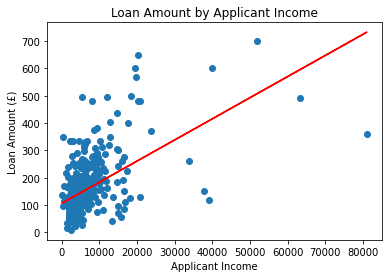

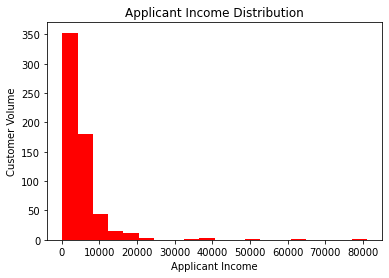

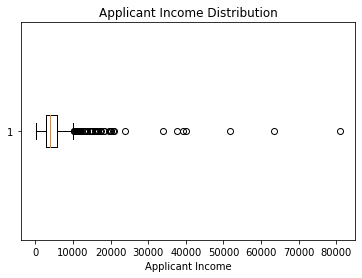

In [ ]:

x = loans_clean3["ApplicantIncome"]
y = loans_clean3["LoanAmount"]

# Scatter plot
plt.scatter(x, y)
plt.title("Loan Amount by Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (£)")
m, b = np.polyfit(x, y, 1) #Add line of best-fit
plt.plot(x, m*x + b, color='red')
plt.show()
print('\n')

# Check Histogram 
plt.hist(x,bins=20,histtype='bar',color='red')
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Customer Volume")
plt.show()
print('\n')

# Check Boxplot
plt.boxplot(x,vert=False)
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.show()



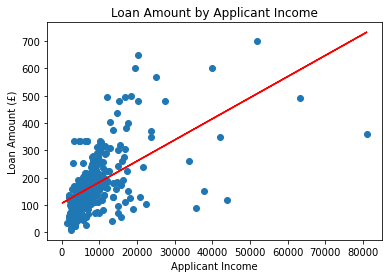

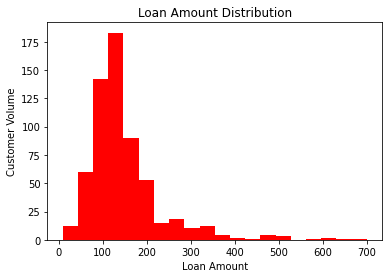

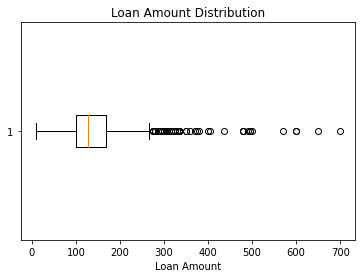

In [ ]:
# B4.2: ACCURACY/OUTLIERS - look at total applicant income
x1 = loans_clean3["ApplicantIncome"] + loans_clean3["CoapplicantIncome"]

# Scatter plot to show Loan Amount by ALL Applicant Income
plt.scatter(x1, y)
plt.title("Loan Amount by Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (£)")
m, b = np.polyfit(x, y, 1) #Add line of best-fit
plt.plot(x, m*x + b, color='red')
plt.show()
print('\n')

# Histogram - Loan Amount
plt.hist(y,bins=20,histtype='bar',color='red')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Customer Volume")
plt.show()
print('\n')

# Check Boxplot
plt.boxplot(y,vert=False)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()

# 2: Exploratory Data Analysis

### B6: FEATURE CREATION - Create features for descriptive analysis.

In [ ]:
loans_clean4 = pd.DataFrame(loans_clean3)

# Total income may impact loan decision for joint applications
loans_clean4['TotalApplicantIncome'] = loans_clean4['ApplicantIncome'] + loans_clean4['CoapplicantIncome']

# Repayment amount to income ratio could indicate whether loan is affordable
loans_clean4['Repayment_v_Income'] = ((loans_clean4['LoanAmount'] / loans_clean4['Loan_Amount_Term']) / loans_clean4['TotalApplicantIncome']) * 100
loans_clean4['Repayment_v_IncomeBins'] = pd.qcut(loans_clean4['Repayment_v_Income'], 4, labels=["Low","Low-Mid","Mid-High","High"])

# Loan to Income ratio could be affordability proxy
loans_clean4['Loan_v_Income'] = (loans_clean4['LoanAmount'] / loans_clean4['TotalApplicantIncome']) * 100
loans_clean4['Loan_v_IncomeBins'] = pd.qcut(loans_clean4['Loan_v_Income'], 4, labels=["Low","Low-Mid","Mid-High","High"])

# Joint Application Flag
loans_clean4['Joint_App'] = np.where(loans_clean4['CoapplicantIncome']>0, 'Yes', 'No')

# Total Applicant Income Bands
loans_clean4['TotalIncomeBins'] = pd.qcut(loans_clean4['TotalApplicantIncome'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

print(loans_clean4.shape)
print(loans_clean4.dtypes)
loans_clean4.head(10)

(614, 19)
Gender                       int64
Married                      int64
Dependents                   int64
Graduate                     int64
Self_Employed                int64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                   int64
Loan_Amount_Term             int64
Credit_History               int64
Property_Area                int64
Loan_Status                 object
TotalApplicantIncome       float64
Repayment_v_Income         float64
Repayment_v_IncomeBins    category
Loan_v_Income              float64
Loan_v_IncomeBins         category
Joint_App                   object
TotalIncomeBins           category
dtype: object


,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,Repayment_v_Income,Repayment_v_IncomeBins,Loan_v_Income,Loan_v_IncomeBins,Joint_App,TotalIncomeBins
Loan_ID,,,,,,,,,,,,,,,,,,,
1002,1,0,0,1,0,5849.0,0.0,128,360,1,1,Y,5849.0,0.006079,Low-Mid,2.188408,Low-Mid,No,6
1003,1,1,1,1,0,4583.0,1508.0,128,360,1,3,N,6091.0,0.005837,Low-Mid,2.101461,Low-Mid,Yes,7
1005,1,1,0,1,1,3000.0,0.0,66,360,1,1,Y,3000.0,0.006111,Low-Mid,2.200000,Low-Mid,No,1
1006,1,1,0,0,0,2583.0,2358.0,120,360,1,1,Y,4941.0,0.006746,Low-Mid,2.428658,Mid-High,Yes,5
1008,1,0,0,1,0,6000.0,0.0,141,360,1,1,Y,6000.0,0.006528,Low-Mid,2.350000,Low-Mid,No,6
1011,1,1,2,1,1,5417.0,4196.0,267,360,1,1,Y,9613.0,0.007715,Mid-High,2.777489,Mid-High,Yes,9
1013,1,1,0,0,0,2333.0,1516.0,95,360,1,1,Y,3849.0,0.006856,Low-Mid,2.468174,Mid-High,Yes,3
1014,1,1,3,1,0,3036.0,2504.0,158,360,0,2,N,5540.0,0.007922,Mid-High,2.851986,High,Yes,6
1018,1,1,2,1,0,4006.0,1526.0,168,360,1,1,Y,5532.0,0.008436,High,3.036876,High,Yes,6


### B7: Save output to csv and download copy.

In [ ]:
loans_clean4.to_csv('Full_Loans_Dataset_2.csv')

from google.colab import files
files.download('Full_Loans_Dataset_2.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# C: Descriptive Analysis

### C1: Read in modified dataset for exploratory data analysis.

In [ ]:
zl1 = pd.read_csv('Full_Loans_Dataset_2.csv', index_col=['Loan_ID'])
zl1.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,Repayment_v_Income,Repayment_v_IncomeBins,Loan_v_Income,Loan_v_IncomeBins,Joint_App,TotalIncomeBins
Loan_ID,,,,,,,,,,,,,,,,,,,
1002,1,0,0,1,0,5849.0,0.0,128,360,1,1,Y,5849.0,0.006079,Low-Mid,2.188408,Low-Mid,No,6
1003,1,1,1,1,0,4583.0,1508.0,128,360,1,3,N,6091.0,0.005837,Low-Mid,2.101461,Low-Mid,Yes,7
1005,1,1,0,1,1,3000.0,0.0,66,360,1,1,Y,3000.0,0.006111,Low-Mid,2.200000,Low-Mid,No,1
1006,1,1,0,0,0,2583.0,2358.0,120,360,1,1,Y,4941.0,0.006746,Low-Mid,2.428658,Mid-High,Yes,5
1008,1,0,0,1,0,6000.0,0.0,141,360,1,1,Y,6000.0,0.006528,Low-Mid,2.350000,Low-Mid,No,6


### C2.1: Q: Did joint applications get higher acceptance rates? A: Yes

Loan_Status      N      Y
Joint_App                
No           35.16  64.84
Yes          28.15  71.85
All          31.27  68.73 
 AxesSubplot(0.125,0.125;0.775x0.755)


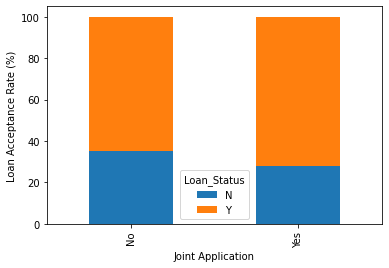

In [ ]:
C2_1 = pd.crosstab(index=zl1["Joint_App"], columns=zl1["Loan_Status"], normalize='index', margins=True).round(4)*100
ax1 = (round(pd.crosstab(index=zl1["Joint_App"], columns=zl1["Loan_Status"], 
                           normalize='index'),4)*100).plot(kind='bar', stacked=True, 
                           xlabel='Joint Application',ylabel='Loan Acceptance Rate (%)')
print(C2_1, '\n', ax1) # Joint applications did get higher acceptance rates

### C2.2: Q: Do Joint Applications have higher income? A: Possibly – higher income bands 3-9 are more likely to be joint.

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


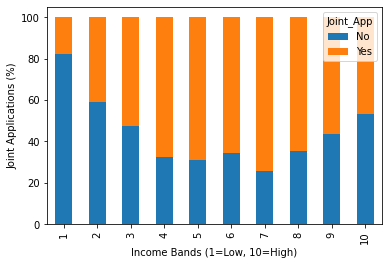

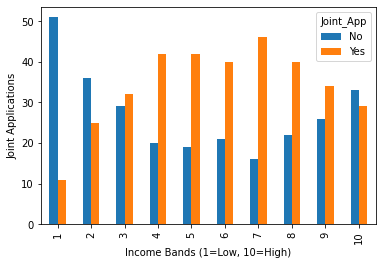

In [ ]:
# First chart shows percentages
C2_2 = (round(pd.crosstab(index=zl1["TotalIncomeBins"], columns=zl1["Joint_App"], 
                           normalize='index'),4)*100).plot(kind='bar', stacked=True,
                           xlabel='Income Bands (1=Low, 10=High)',ylabel='Joint Applications (%)')
# Second chart shows asbolute values side by side
C2_21 = pd.crosstab(index=zl1["TotalIncomeBins"],columns=zl1["Joint_App"]).plot(kind='bar', 
                           xlabel='Income Bands (1=Low, 10=High)',ylabel='Joint Applications')
print(C2_2,C2_21) 

### C3: Q: Is income band influential in determining loan acceptance outcome? A: No.

Loan_Status,N,Y
TotalIncomeBins,,
1,38.71,61.29
2,31.15,68.85
3,26.23,73.77
4,33.87,66.13
5,29.51,70.49
6,22.95,77.05
7,35.48,64.52
8,30.65,69.35
9,26.67,73.33


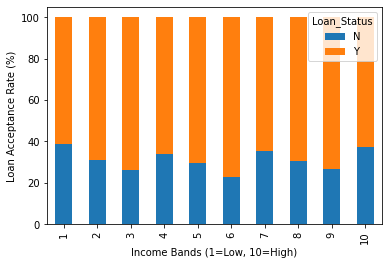

In [ ]:
C3_1 = (round(pd.crosstab(index=zl1["TotalIncomeBins"],columns=zl1["Loan_Status"], 
                           normalize='index', margins=True),4)*100)
C3_2 = (round(pd.crosstab(index=zl1["TotalIncomeBins"],columns=zl1["Loan_Status"], 
                           normalize='index'),4)*100).plot(kind='bar', stacked=True,
                           xlabel='Income Bands (1=Low, 10=High)',ylabel='Loan Acceptance Rate (%)')
C3_1
# There doesn't seem to be a direct relationship between Total Income band and Loan Acceptance

### C4: Q: Did applicants with Credit History stand a higher change of approval? A: Yes

In [ ]:
C4 = pd.crosstab(index=zl1["Credit_History"], columns=zl1["Loan_Status"], normalize='index', margins=True).round(4)*100
C4 # A credit history is likely to lead to increased acceptance rates

Loan_Status,N,Y
Credit_History,,
0,68.35,31.65
1,20.42,79.58
All,31.27,68.73


### C5: Q: Who has higher average income, Male or Female Graduates? A: Male Graduates.

OBSERVATION: Income outliers are inflating mean incomes.


In [ ]:
# Use If statement to figure out which is higher and by how much:
zl1_gradm = zl1[(zl1["Graduate"] == 1) & (zl1["Gender"] == 1)] # Male Grads
print("Male Graduates have average income of £",round(zl1_gradm["ApplicantIncome"].mean(),2))
zl1_gradf = zl1[(zl1["Graduate"] == 1) & (zl1["Gender"] == 2)] # Female Grads
print("Female Graduates have average income of £",round(zl1_gradf['ApplicantIncome'].mean(),2))
if zl1_gradm["ApplicantIncome"].mean() > zl1_gradf['ApplicantIncome'].mean():
  print("Male grads have a mean income that is",
        round(zl1_gradm["ApplicantIncome"].mean() / zl1_gradf['ApplicantIncome'].mean()*100-100,0),
        "% higher than Female grads")
elif zl1_gradm["ApplicantIncome"].mean() < zl1_gradf['ApplicantIncome'].mean():
  print("Female grads have a mean income that is",
        round(zl1_gradm["ApplicantIncome"].mean() / zl1_gradf['ApplicantIncome'].mean()*100-100,0),
        "% higher than Male grads")
else:
  print("Female and Male mean incomes are equal")

# Show median/mean
C5 = zl1.groupby(['Graduate','Gender'])['TotalApplicantIncome'].agg(count='size', mean='mean', median='median').round(0)
C5 

Male Graduates have average income of £ 6144.57
Female Graduates have average income of £ 4646.47
Male grads have a mean income that is 32.0 % higher than Female grads


count    mean  median
Graduate Gender                       
0        1         114  5033.0  4880.0
         2          20  5171.0  3984.0
1        1         388  7977.0  5969.0
         2          92  5878.0  4322.0

### C6: Q: Are Male or Female applicants more likely to get a loan accepted? A: Male, marginally

In [ ]:
C6 = pd.crosstab(index=zl1["Gender"], columns=zl1["Loan_Status"], normalize='index', margins=True).round(4)*100
C6 

Loan_Status,N,Y
Gender,,
1,30.88,69.12
2,33.04,66.96
All,31.27,68.73


### C7.1: Q: Which variables are closely correlated with Loan Status?

Gender                 -0.017987
Married                 0.084281
Dependents              0.010118
Graduate                0.085884
Self_Employed          -0.003700
ApplicantIncome        -0.004710
CoapplicantIncome      -0.059187
LoanAmount             -0.047440
Loan_Amount_Term       -0.033615
Credit_History          0.432616
Property_Area          -0.032112
TotalApplicantIncome   -0.031271
Repayment_v_Income     -0.059261
Loan_v_Income          -0.097348
TotalIncomeBins         0.009397
Loan_Status_Int         1.000000
dtype: float64


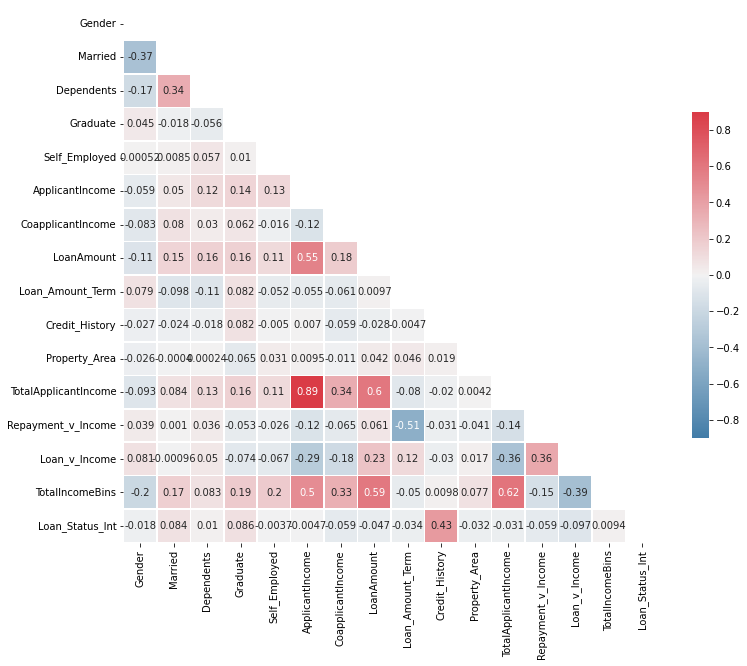

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,Repayment_v_Income,Repayment_v_IncomeBins,Loan_v_Income,Loan_v_IncomeBins,Joint_App,TotalIncomeBins,Loan_Status_Int
Loan_ID,,,,,,,,,,,,,,,,,,,,
1002,1,0,0,1,0,5849.0,0.0,128,360,1,1,Y,5849.0,0.006079,Low-Mid,2.188408,Low-Mid,No,6,1
1003,1,1,1,1,0,4583.0,1508.0,128,360,1,3,N,6091.0,0.005837,Low-Mid,2.101461,Low-Mid,Yes,7,0
1005,1,1,0,1,1,3000.0,0.0,66,360,1,1,Y,3000.0,0.006111,Low-Mid,2.200000,Low-Mid,No,1,1
1006,1,1,0,0,0,2583.0,2358.0,120,360,1,1,Y,4941.0,0.006746,Low-Mid,2.428658,Mid-High,Yes,5,1
1008,1,0,0,1,0,6000.0,0.0,141,360,1,1,Y,6000.0,0.006528,Low-Mid,2.350000,Low-Mid,No,6,1


In [ ]:
# Need to create a new var - Loan_Status as a numeric to support correlation
zl1['Loan_Status_Int'] = np.where(zl1['Loan_Status'] == 'Y', 1, 0)

import seaborn as sns # Import seaborn to create heatmap

correlation1 = zl1.corrwith(zl1['Loan_Status_Int'])
print(correlation1)

# Use pandas corr and seaborn to create full correlation matrix and a half-heatmap.
correlation2 = zl1.corr()

# Set up the  figure - large to enable values to be shown
f, ax = plt.subplots(figsize=(12, 12))

# Generate a mask for the upper triangle using triu (replacing with ones)
mask = np.triu(np.ones_like(correlation2, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation2, mask=mask, cmap=cmap, vmin=-0.9, vmax=0.9, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

correlation2
zl1.head()

### C7.2: **Correlations Commentary**

Positive linear correlations exist between: 
- Married & Dependents
- Applicant Income & Loan Amount
- Loan Status & Credit History

Lower positive linear correlations exist between Graduate, Self-Employed and Dependents vs. Loan Amount.

Negative linear correlations exist between Gender vs. Married / Loan amount / Total Applicant Income

Other correlations relate to new variables created for analysis. They should be removed from features ahead of modelling, to avoid overstating their influence.

**Ethical Considerations**

Based on regulatory framework and the risk of model bias, I would not include Gender or Graduate flags because the decision whether to accept a loan application shouldn't be based on gender/education. A model that favours either is displaying bias, risking s detrimental outcomes.

### C8: Save output to csv and download copy

In [ ]:
zl1.shape
zl1.to_csv('Full_Loans_Dataset_3.csv')

from google.colab import files
files.download('Full_Loans_Dataset_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# D: Predictive Analysis

This section uses the SciKitLearn code library, from where we will import useful modules.

### D1: Read in modified dataset, to prepare for model build.

In [ ]:
zl2 = pd.read_csv('Full_Loans_Dataset_3.csv', index_col=['Loan_ID'])
zl2.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,Repayment_v_Income,Repayment_v_IncomeBins,Loan_v_Income,Loan_v_IncomeBins,Joint_App,TotalIncomeBins,Loan_Status_Int
Loan_ID,,,,,,,,,,,,,,,,,,,,
1002,1,0,0,1,0,5849.0,0.0,128,360,1,1,Y,5849.0,0.006079,Low-Mid,2.188408,Low-Mid,No,6,1
1003,1,1,1,1,0,4583.0,1508.0,128,360,1,3,N,6091.0,0.005837,Low-Mid,2.101461,Low-Mid,Yes,7,0
1005,1,1,0,1,1,3000.0,0.0,66,360,1,1,Y,3000.0,0.006111,Low-Mid,2.200000,Low-Mid,No,1,1
1006,1,1,0,0,0,2583.0,2358.0,120,360,1,1,Y,4941.0,0.006746,Low-Mid,2.428658,Mid-High,Yes,5,1
1008,1,0,0,1,0,6000.0,0.0,141,360,1,1,Y,6000.0,0.006528,Low-Mid,2.350000,Low-Mid,No,6,1


### D2: Create target dataset and feature dataset. As there are only two possible outcomes, we will be using binary classification methods to predict the target variable.

The feature dataset are the variables used to predict an outcome. Predictor variables based on brief: Gender, Married, Dependents, Self-Employed, Graduate, Credit_History, Property_Area


In [ ]:
x = zl2.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
              'Loan_Status','TotalApplicantIncome','Repayment_v_Income','Repayment_v_IncomeBins',
              'Loan_v_Income','Joint_App','TotalIncomeBins','Loan_Status_Int', 'Loan_v_IncomeBins'], axis=1) # Predictor variables
y = zl2['Loan_Status'] # Target dataset
print(x.shape, y.shape, '\n', x.dtypes, y.dtypes)


(614, 7) (614,) 
 Gender            int64
Married           int64
Dependents        int64
Graduate          int64
Self_Employed     int64
Credit_History    int64
Property_Area     int64
dtype: object object


### D3: Scale data to remove influence of high variance in key columns.

Feature variables don't have high variance, but it makes sense to ensure each variable has an equal chance to feature in a distance-based classifier (e.g. KNearest Neighbour). The Min-Max method gives a value between 0 and 1 for all variables, using the formula below.

$x'=\frac{x-min(x)}{max(x)-min(x)}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# define min-max scaler
scaler = MinMaxScaler()
# transform data
xs = scaler.fit_transform(x)
print(xs)

[[0.         0.         0.         ... 0.         1.         0.        ]
 [0.         1.         0.33333333 ... 0.         1.         1.        ]
 [0.         1.         0.         ... 1.         1.         0.        ]
 ...
 [0.         1.         0.33333333 ... 0.         1.         0.        ]
 [0.         1.         0.66666667 ... 0.         1.         0.        ]
 [1.         0.         0.         ... 1.         0.         0.5       ]]


### D4: Split population into test and train datasets.

As the dataset we are working with is small, I tried various population splits (undocumented). The results suggest that a 50/50% split across training and test datasets provides for a good sample to both train and validate the model.




In [ ]:
from sklearn.model_selection import train_test_split

# Create model training and test splits.  Then check shapes
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.5, random_state = 1) # Random state = 1 ensures results are reproducible through seeding
print("x-train:", x_train.shape)
print("x-test:", x_test.shape)
print("y-train:", y_train.shape)
print("y-test:", y_test.shape)

x-train: (307, 7)
x-test: (307, 7)
y-train: (307,)
y-test: (307,)


### D5: Create classifications using training data, using default settings of 5 models chosen specifically for binary classification from scikit learn library.

In [ ]:
# Import Scikit Learn libraries for the classifications we'll build
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#Fit and predict each model type based on default settings
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

### D6: Import Classification report to see effectiveness metrics for each classifier vs. test dataset.

* TP = True Positive
* TN = True Negative
* FP = False Positive
* FN = False Negative

While Accuracy is a good measure, approving a loan incorrectly is worse than NOT approving a loan we should have done, due to cost of loan default, so it's important to understand precision and recall. F1 score can analyse as one outcome.

$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$ - For all labelled as approved, how many were actually approved?

$Precision = \frac{TP}{TP+FP}$ - For all loans labelled as approved, how many were actually approved?

$Recall = \frac{TP}{TP+FN}$ - For all approved loans, how many did we label correctly?

$F1 Score = \frac {TP}{TP+\frac{1}{2}(FP+FN)}$ - Weighted average of Precision & Recall


In [ ]:
from sklearn.metrics import classification_report

# Check measures against each model prediction
print("Decision Tree: \n",classification_report(y_test, dt_pred))
print("K-Nearest Neighbour: \n",classification_report(y_test, knn_pred))
print("Random Forest: \n",classification_report(y_test, rf_pred))
print("Gradient Boosting: \n",classification_report(y_test, gb_pred))
print("Logistic Regression: \n",classification_report(y_test, log_pred))

Decision Tree: 
               precision    recall  f1-score   support

           N       0.57      0.39      0.46        98
           Y       0.75      0.86      0.80       209

    accuracy                           0.71       307
   macro avg       0.66      0.62      0.63       307
weighted avg       0.69      0.71      0.69       307

K-Nearest Neighbour: 
               precision    recall  f1-score   support

           N       0.71      0.38      0.49        98
           Y       0.76      0.93      0.84       209

    accuracy                           0.75       307
   macro avg       0.74      0.65      0.66       307
weighted avg       0.75      0.75      0.73       307

Random Forest: 
               precision    recall  f1-score   support

           N       0.67      0.39      0.49        98
           Y       0.76      0.91      0.83       209

    accuracy                           0.74       307
   macro avg       0.71      0.65      0.66       307
weighted avg     

### D7: According to the combined measures, Logistic Regression is strongest at predicting approved and declined loans, and has the best f1 scores.

The confusion matrix shows 187 of 209 approved loans and 48 out of 98 declined loans predicted correctly - our best result from all default models.

Coefficients in the model show the influence that each variable has on the outcome. Credit_History has an overwhelming influence, in line with observations on the correlation plot.

NB: My best model was chosen based on scikit learn default settings, but it's recommended to adjust model settings or feature variables for each type of model to achieve optimal outcomes.



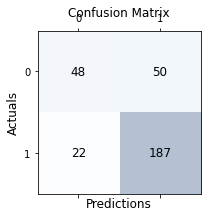

                0  Coefficients
5  Credit_History      1.985997
1         Married      0.431581
0          Gender      0.335669
3        Graduate      0.197545
6   Property_Area      0.112889
4   Self_Employed     -0.081860
2      Dependents     -0.060026


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, log_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

# Create dataframe to show table of coefficients in order of influence
coef_table = pd.DataFrame(list(x.columns)).copy()
coef_table.insert(len(coef_table.columns),'Coefficients',log.coef_.transpose())
print(coef_table.sort_values(by='Coefficients', ascending=False, key=abs))

### D8: Predict outcomes for logistic regression with new data.

Create array of new values to score, predict outcome, then create dataframe with predictions for all models appended.


In [ ]:
new_applicants = {'Gender': [0,1,1,1,0],
                  'Married': [0,1,0,1,1],
                  'Dependents': [0,0.33,0.66,0,1],
                  'Graduate': [1,0,0,1,1],
                  'Self-Employed': [1,0,0,0,1],
                  'Credit_History': [1,0,0,0,1],
                  'Property_Area': [0,0.5,0,1,0.5]
                  }
df_new = pd.DataFrame(new_applicants,columns= ['Gender', 'Married','Dependents','Graduate','Self-Employed','Credit_History','Property_Area'])
log_pred2 = log.predict(df_new)
# We can also see if other models may have predicted differently
dt_pred2 = dt.predict(df_new)
knn_pred2 = knn.predict(df_new)
rf_pred2 = rf.predict(df_new)
gb_pred2 = gb.predict(df_new)

# Append outcomes to dataframe
df_new['log_prediction'] = log_pred2
df_new['dt_prediction'] = dt_pred2
df_new['knn_prediction'] = knn_pred2
df_new['rf_prediction'] = rf_pred2
df_new['gb_prediction'] = gb_pred2
df_new



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature nam

,Gender,Married,Dependents,Graduate,Self-Employed,Credit_History,Property_Area,log_prediction,dt_prediction,knn_prediction,rf_prediction,gb_prediction
0,0,0,0.00,1,1,1,0.0,Y,N,N,N,Y
1,1,1,0.33,0,0,0,0.5,N,Y,Y,Y,Y
2,1,0,0.66,0,0,0,0.0,N,Y,Y,N,Y
3,1,1,0.00,1,0,0,1.0,N,Y,Y,Y,N
4,0,1,1.00,1,1,1,0.5,Y,N,Y,Y,Y
